<a href="https://colab.research.google.com/github/shahdevansh28/ML/blob/main/ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<class 'pandas.core.series.Series'>


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


      08  0830  09  0g  0mie  10  100  1000  100000  1000000  ...  ½r  ½re  \
0      0     0   0   0     0   0    0     0       0        0  ...   0    0   
1      0     0   0   0     0   0    0     0       0        0  ...   0    0   
2      0     0   0   0     0   0    0     0       0        0  ...   0    0   
3      0     0   0   0     0   0    0     0       0        0  ...   0    0   
4      0     0   0   0     0   0    0     0       0        0  ...   0    0   
...   ..   ...  ..  ..   ...  ..  ...   ...     ...      ...  ...  ..  ...   
3995   0     0   0   0     0   0    0     0       0        0  ...   0    0   
3996   0     0   0   0     0   0    0     0       0        0  ...   0    0   
3997   0     0   0   0     0   0    0     0       0        0  ...   0    0   
3998   0     0   0   0     0   0    0     0       0        0  ...   0    0   
3999   0     0   0   0     0   0    0     0       0        0  ...   0    0   

      ½s  ½se  ½t  ½tieï  ½tobe  ½u  ½y  ½ï  
0      0    0   0

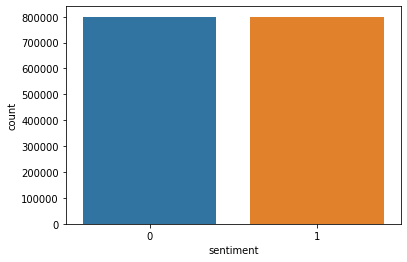

In [1]:
# importing some required libraries
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


#nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')


columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("drive/MyDrive/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)
df.head()

df["sentiment"] = df["sentiment"].replace(4,1)

# plotting the data using countplot
sns.countplot(x="sentiment",data=df)

#creating a string of positive tweets to analyze the words
positive_tweets = df[df['sentiment'] == 1]
# data_pos = data[data['target'] == 1]
#data_neg = data[data['target'] == 0]
# creating the string of negative tweets to analyze the words
negative_tweets = df[df['sentiment'] == 0]

positive_tweets = positive_tweets.iloc[:int(2000)]
negative_tweets = negative_tweets.iloc[:int(2000)]

dataset = pd.concat([positive_tweets, negative_tweets])

dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

stop_words = set(stopwords.words('english'))

#remove stop words
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

#remove punctuation
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

#remove urls
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

print(type(dataset['text']))


coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(dataset['text'])
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
print(df)
coun_vect.vocabulary_
print(count_matrix)

In [ ]:
coun_vect.vocabulary_


{'love': 5233,
 'health4uandpets': 3775,
 'guys': 3644,
 'best': 959,
 'im': 4295,
 'meeting': 5541,
 'one': 6272,
 'besties': 964,
 'tonight': 8779,
 'cant': 1432,
 'wait': 9311,
 'girl': 3429,
 'talk': 8479,
 'darealsunisakim': 2152,
 'thanks': 8578,
 'twitter': 8992,
 'add': 276,
 'sunisa': 8366,
 'got': 3528,
 'meet': 5540,
 'hin': 3890,
 'show': 7762,
 'dc': 2199,
 'area': 608,
 'sweetheart': 8426,
 'sick': 7783,
 'really': 7103,
 'cheap': 1572,
 'hurts': 4227,
 'much': 5863,
 'eat': 2635,
 'real': 7095,
 'food': 3166,
 'plus': 6659,
 'friends': 3270,
 'make': 5363,
 'soup': 8045,
 'lovesbrooklyn2': 5242,
 'effect': 2661,
 'everyone': 2837,
 'productoffear': 6819,
 'tell': 8533,
 'burst': 1334,
 'laughing': 4962,
 'loud': 5224,
 'making': 5368,
 'come': 1804,
 'sulk': 8357,
 'rkeithhill': 7309,
 'thans': 8584,
 'response': 7240,
 'ihad': 4274,
 'already': 435,
 'find': 3056,
 'answer': 539,
 'keepinupwkris': 4760,
 'jealous': 4541,
 'hope': 3969,
 'great': 3569,
 'time': 8707,
 'v